In [22]:
%run -i code_time_measurement.ipynb

In [23]:
tic()

In [24]:
import matplotlib.pyplot as plt
import scipy
import numpy as np
import pandas as pd

In [25]:
#file no. two has to be run from here, and the called function needs the return for the variable(s) of interest
%run -i two_masonry_compressive_resistance.ipynb 
#https://www.acgeospatial.co.uk/running-functions-juypter/
#https://github.com/ipython/ipynb

normalised mean compressive unit:  11.799999999999999
characteristic_compressive_masonry = 4.691  MPa
k = 1.645
mean_compressive_masonry = 6.228  MPa
Stored 'compressive_resistances' (list)


In [26]:
compressive_resistances #to check that the called function returns the variable(s) of interest. Therefore, storing variables would not be needed anymore.

[4.691352777703492, 6.2279668592488475]

In [27]:
f_k = compressive_resistances[0] #it's not used by the code, it's shown oly for record
f_mean = compressive_resistances[1]

In [28]:
print(f_k)
print(f_mean)

4.691352777703492
6.2279668592488475


In [29]:
f_cov = 0.15

In [30]:
f_std = f_mean * f_cov

In [31]:
print(f_std)

0.9341950288873271


Monte Carlo simulations

In [32]:
simulations_number = 100_000 #assumed

In [33]:
np.random.seed(2)

In [34]:
u = np.random.uniform(low=0, high=1, size=simulations_number) #probability realisations
u[0:5]

array([0.4359949 , 0.02592623, 0.54966248, 0.43532239, 0.4203678 ])

In [35]:
x = scipy.stats.norm.ppf(u) #inverse of the normal distribution
x[0:5]

array([-0.16113153, -1.9443566 ,  0.12480864, -0.16283953, -0.20095264])

In [36]:
r = x*f_std + f_mean #vector of realisations
r[0:5]

array([6.07743858, 4.41155859, 6.34456247, 6.07584298, 6.0402379 ])

In [37]:
compressive_resistance_distribution = scipy.stats.norm.pdf(np.sort(r), f_mean, f_std)
#https://stackoverflow.com/questions/10138085/how-to-plot-normal-distribution
#https://www.askpython.com/python/normal-distribution
#https://vitalflux.com/normal-distribution-explained-python-examples/

In [38]:
# x_label_pdf = input()
# y_label_pdf = input()

Text(0, 0.5, 'Probability density')

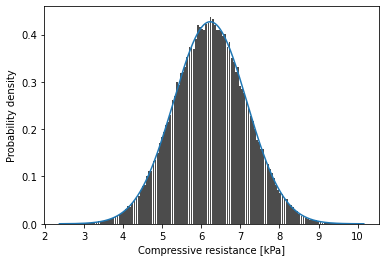

In [39]:
#https://realpython.com/python-histograms/
n, bins, patches = plt.hist(x=r, bins='auto', color='black', alpha=0.7, rwidth=0.85, density=True)

plt.plot(np.sort(r), compressive_resistance_distribution)
plt.xlabel('Compressive resistance [kPa]')
plt.ylabel('Probability density')
# plt.xlabel(x_label_pdf)
# plt.ylabel(y_label_pdf)

In [40]:
realisations_vector = np.transpose(np.sort(r))

In [41]:
realisations_series = pd.Series(realisations_vector)

In [42]:
realisations_header = 'masonry_compressive_realisations'

In [43]:
realisations_vector_file_name = 'masonry_compressive_realisations.csv'

In [44]:
realisations_series.to_csv(realisations_vector_file_name, header = [realisations_header], index = False)

Convergence assessment (see Ballio and Guadagnini, 2004)

In [45]:
realisations_list = []
mean_list = []
var_list = []

In [46]:
# def random_choice(sample_vector, sample_size):
    
#     r_sample_size = np.random.choice(sample_vector, size=sample_size, replace=False, p=None)
#     r_sample_size_mean = np.mean(r_sample_size)
#     r_sample_size_std = np.std(r_sample_size)

#     mean_list.append(r_sample_size_mean)
#     std_list.append(r_sample_size_std)
    
#     return r_sample_size, mean_list, std_list

In [47]:
# random_choice(r, simulations_number)

In [48]:
def random_choice(sample_vector, sample_size):
    
    for i in range(sample_size):
        # print(i+1)
        r_sample_size = np.random.choice(sample_vector, size=i+1, replace=False, p=None)
        r_sample_size_mean = np.mean(r_sample_size)
        r_sample_size_var = np.var(r_sample_size)

        realisations_list.append(r_sample_size)
        mean_list.append(r_sample_size_mean)
        var_list.append(r_sample_size_var)
    
    #return realisations_list, mean_list, var_list

In [49]:
random_choice(r, simulations_number) #it takes 4m 32s on average

In [50]:
n = np.arange(1,simulations_number+1, 1)

#print(n)

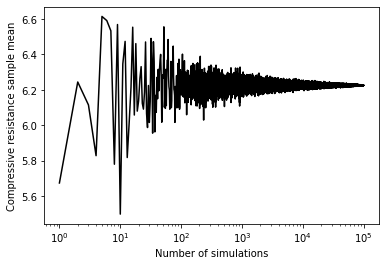

In [51]:
plt.plot(n, mean_list, color='black') #https://stackoverflow.com/questions/41709257/how-to-change-the-plot-line-color-from-blue-to-black#:~:text=The%20usual%20way%20to%20set,explicitely%20stating%20the%20color%20argument.
#plt.xticks(range(1,iterations+1)) #https://stackoverflow.com/questions/52229875/how-to-force-matplotlib-to-show-values-on-x-axis-as-integers
plt.xticks(n) #https://towardsdatascience.com/change-tick-frequency-matplotlib-axis-6af2c6bce1ea
plt.xlabel("Number of simulations")
plt.ylabel("Compressive resistance sample mean")

plt.xscale('log') #https://stackoverflow.com/questions/773814/plot-logarithmic-axes

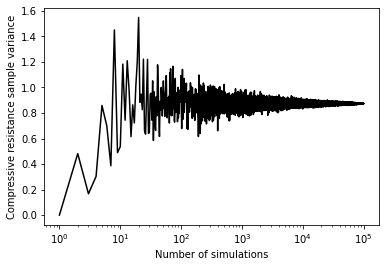

In [52]:
plt.plot(n, var_list, color='black')
plt.xticks(range(1,simulations_number+1))
plt.xlabel("Number of simulations")
plt.ylabel("Compressive resistance sample variance")

plt.xscale('log')

Moments calculation

In [53]:
second_moment_list = []

In [54]:
# for i in range(simulations_number):
#     print(i)
#     print(realisations_list[i])

In [55]:
def second_moment_calculation(realisations):
    for i in range(simulations_number):
        sample_second_moment=scipy.stats.moment(realisations[i], moment=2)

        second_moment_list.append(sample_second_moment)

        #print(second_moment_list)    #return second_moment_list

In [56]:
second_moment_calculation(realisations_list)

In [57]:
sample_mean_cov_list = []
r_array = np.array(r)
sample_mean = np.mean(r_array)

In [58]:
def sample_mean_cov_calculation(second_moments):

    for i in range(simulations_number):
        sample_mean_cov = second_moments[i]/sample_mean
        
        sample_mean_cov_list.append(sample_mean_cov)

    #return sample_mean_cov_list

In [59]:
sample_mean_cov_calculation(second_moment_list)

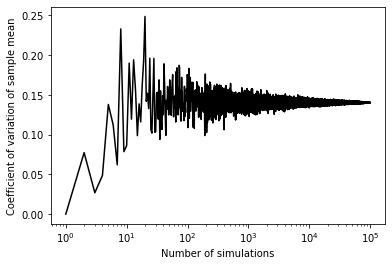

In [60]:
plt.plot(n, sample_mean_cov_list, color='black')
plt.xticks(range(1,simulations_number+1))
plt.xlabel("Number of simulations")
plt.ylabel("Coefficient of variation of sample mean")

plt.xscale('log')

In [61]:
fourth_moment_list = []

In [62]:
def fourth_moment_calculation(realisations):
    for i in range(simulations_number):
        sample_fourth_moment=scipy.stats.moment(realisations[i], moment=4)

        fourth_moment_list.append(sample_fourth_moment)

        #print(second_moment_list)
    #return fourth_moment_list

In [63]:
fourth_moment_calculation(realisations_list)

In [64]:
sample_variance_cov_list = []
sample_variance = np.var(r_array)

In [65]:
def sample_variance_cov_calculation(fourth_moments):
    for i in range(simulations_number):
        sample_variance_cov = fourth_moments[i]/sample_variance

        sample_variance_cov_list.append(sample_variance_cov)

    #return sample_mean_cov_list

In [66]:
sample_variance_cov_calculation(fourth_moment_list)

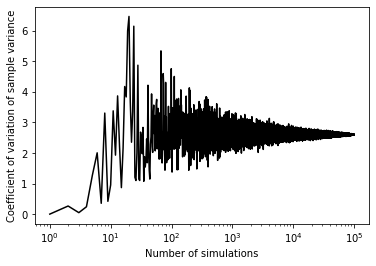

In [67]:
plt.plot(n, sample_variance_cov_list, color='black')
plt.xticks(range(1,simulations_number+1))
plt.xlabel("Number of simulations")
plt.ylabel("Coefficient of variation of sample variance")

plt.xscale('log')

In [68]:
compressive_resistance_realisations = r
convergence_simulation_number = 100_000 #it can be deducted from the horizontal asyntote on the right

In [69]:
%store compressive_resistance_realisations
%store convergence_simulation_number

Stored 'compressive_resistance_realisations' (ndarray)
Stored 'convergence_simulation_number' (int)


In [70]:
toc()

Elapsed time: 840.440055 seconds.

Elapsed time: 14.007334 minutes.

Elapsed time: 0.233456 hours.

